# **Section 6: Plotting**

In this section we will cover a few basic preprocessing techniques and how to create some basic graphs.  

First, lets load the data set we have been using throughout the tutorial.  

In [15]:
import pandas
import numpy
import math
stock_data = pandas.read_csv("example.csv", index_col='timestamp', parse_dates=True)
stock_data = stock_data.iloc[::-1]

Scaling is a preprossessing technique that is used take a column with varied values and process them in a way to make it easier for a machine learning model to train on. Scaling converts all the values in a column to a decimal between 0 and 1. 

In [16]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Creates a min max scaler to scale the data
scaler = MinMaxScaler();
# Print the values before scaling
print("Before:\n\n", stock_data['volume'].head(3),'\n')
# Performs the scaling on the volume column
stock_data[['volume']] = scaler.fit_transform(stock_data[['volume']])
# Print the values after scaling
print("After:\n\n", stock_data['volume'].head(3), '\n')

Before:

 timestamp
2000-02-29     667243800
2000-03-31    1014093800
2000-04-28    1129073300
Name: volume, dtype: int64 

After:

 timestamp
2000-02-29    0.112088
2000-03-31    0.241633
2000-04-28    0.284577
Name: volume, dtype: float64 



** Matplotlib.pyplot is a library commonly used for plotting data. A basic example of a is shown below. **


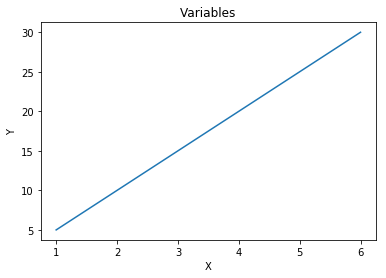

In [17]:
%matplotlib inline
# Importing matplotlib.pylot
import matplotlib.pyplot as plt
# Closes any previous graphs
plt.close('all')
# Variables for the x axis
x = [1, 2, 3, 4, 5, 6]
# Variables for the y axis
y = [5, 10, 15, 20, 25, 30]
# Plots the values
plt.plot(x, y)
# Labels X axis
plt.xlabel("X")
# Labels Y axis
plt.ylabel("Y")
# Sets title
plt.title("Variables")
# Shows the graph
plt.show()
# Clears the graph from matplotlib
plt.close()

**Scatter plots are used to show how much one variable is affected by another. This relationship is called correlation. Below we have graphed the open price of the stock to the volume of the stock on a scatter plot. There does not appear to be a correlation between the two columns. Each dot represents one of the entries in the data set.**

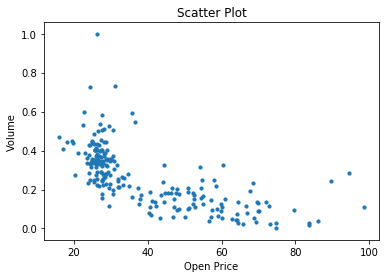

In [18]:
# Creates a scatter plot. The paramter s is the size of the dots
plt.scatter(stock_data['open'], stock_data['volume'], s = 10)
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.title('Scatter Plot')
plt.show()
plt.close()

** A bar chart is used to show differences among discrete categories **

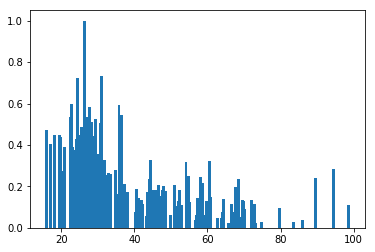

In [19]:
# Bar plot
plt.bar(stock_data['open'], stock_data['volume'])
plt.show()
plt.close()

** Histograms are used to show data distributions. The data is seperated into bins, which is done by dividing the range of values into intervals. Below, The closing prices of the stocks are seperated into bins on the x axis. The number of stock entries that are within each bin are counted on the y axis. We can see that the stock spend a long time in the 25 - 30 price range. **

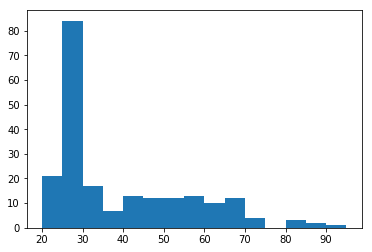

In [20]:
# Histogram
# Bins are the classes
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
plt.hist(stock_data['close'], bins)
plt.show()
plt.close()

** The data frame object from pandas has built in plotting functionality. Below, we have created two new data frames from two different stocks and combined the closing prices of the two stocks into one data frame. The .plot method is then called on the data frame to compare the closing prices between the two stocks. **

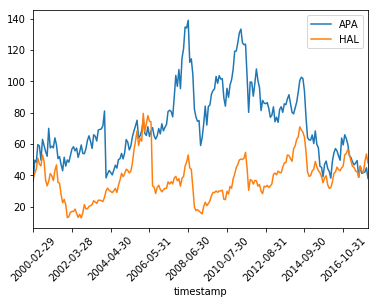

In [21]:
# A data frame is created from the halliburton data that comes with the tutorial
halliburton = pandas.read_csv('monthly_HAL.csv', index_col='timestamp')
# Here we have reversed the data frame so that it starts with the oldest timestamp
halliburton = halliburton.iloc[::-1]
# A data frame is created from the apache data that comes with the tutorial
apache = pandas.read_csv('monthly_APA.csv', index_col='timestamp')
apache = apache.iloc[::-1]
# Here we created a new dataframe from the closing columns of the halliburton and pache data frames
# The names of the new columns and the source are contained in a python dictionary {}
two_stock = pandas.DataFrame({'HAL': halliburton['close'], 'APA': apache['close']})
# The plot method plots the data frame. The rot parameter rotates the x axis labels so they do not overlap. 45 is 45 degrees
two_stock.plot(rot = 45)

Candle stick chart

(<matplotlib.collections.LineCollection at 0x2953ae67b38>,
 <matplotlib.collections.PolyCollection at 0x2953ae67be0>)

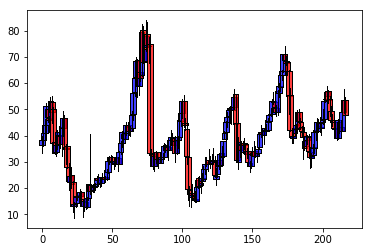

In [22]:
from matplotlib.finance import candlestick2_ohlc
fig, ax = plt.subplots()
candlestick2_ohlc(ax, halliburton['open'], halliburton['high'], halliburton['low'], halliburton['close'],
                  width=4, colorup='b', colordown = 'r', alpha = .75)

In [23]:
import pandas as pd
from pandas_datareader import data, wb
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()